# Подготовка данных и окружения.

In [1]:
# %pip install kaggle
# %pip install kagglehub

# import kaggle
# kaggle.api.authenticate()
# kaggle.api.dataset_download_file(dataset='maharshipandya/-spotify-tracks-dataset')

# import kagglehub
# kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

In [2]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras import metrics

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# EDA и Research-анализ

### Общий обзор данных

In [5]:
data = pd.read_csv('dataset.csv')
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


#### Описание полей датасета Spotify

| Поле                | Описание |
|---------------------|----------|
| **track_id**        | ID трека в Spotify |
| **artists**         | Имена исполнителей трека. Если исполнителей несколько — разделены точкой с запятой (`;`) |
| **album_name**      | Название альбома, в котором находится трек |
| **track_name**      | Название трека |
| **popularity**      | Популярность трека (0–100). 100 — максимальная популярность. Рассчитывается алгоритмом в основном по количеству и актуальности прослушиваний. Треки, которые сейчас активно слушают, имеют более высокую популярность. Одинаковые треки (сингл и альбомная версия) оцениваются отдельно. Популярность артиста и альбома выводится математически из популярности треков |
| **duration_ms**     | Длительность трека в миллисекундах |
| **explicit**        | Присутствует ли нецензурная лексика (`true` — да, `false` — нет или неизвестно) |
| **danceability**    | Танцевальность (0.0 – 1.0). Насколько трек подходит для танцев (учитываются темп, стабильность ритма, сила бита и регулярность) |
| **energy**          | Энергичность (0.0 – 1.0). Отражает интенсивность и активность. Энергичные треки обычно быстрые, громкие и «шумные» (например, дэт-метал — высокая, прелюдия Баха — низкая) |
| **key**             | Тональность трека. Целые числа по стандартной нотации Pitch Class:<br>0 = До (C), 1 = До♯/Ре♭, 2 = Ре (D), …<br>Если не определена — `-1` |
| **loudness**        | Общая громкость трека в децибелах (дБ) |
| **mode**            | Лад: мажор = `1`, минор = `0` |
| **speechiness**     | Речевая насыщенность (0.0 – 1.0):<br>• >0.66 — почти наверняка только речь (ток-шоу, аудиокниги)<br>• 0.33–0.66 — смесь музыки и речи (в т.ч. рэп)<br>• <0.33 — преимущественно музыка |
| **acousticness**    | Уверенность в акустичности трека (0.0 – 1.0). `1.0` — очень высокая вероятность акустического звучания |
| **instrumentalness**| Вероятность отсутствия вокала (0.0 – 1.0). Звуки типа «ooh» и «aah» считаются инструментальными |
| **liveness**        | Вероятность живой записи с аудиторией (0.0 – 1.0). Значения >0.8 с высокой вероятностью указывают на концертную запись |
| **valence**         | Музыкальная позитивность (0.0 – 1.0). Высокие значения — радостные/весёлые/эйфоричные треки, низкие — грустные/злые/депрессивные |
| **tempo**           | Темп трека в ударах в минуту (BPM) |
| **time_signature**  | Оценочный музыкальный размер (количество долей в такте). Значения 3–7 соответствуют 3/4, 4/4, … 7/4 |
| **track_genre**     | Жанр трека |

#### Анализ пропусков

In [6]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

В наших данных есть пропуски, но если приглядеться то эти признаки малозначимы и не критичны + мы можем узнать, что это за трек по track_id. Но самое главное, забегая вперёд, что с таргетом ***(populatiry)*** они коррелируют очень слабо.  

П.А. Конечно на больших выборках данных какой-нибудь **"The Weekend"** в поле **"artists"** в среднем будет популярнее среднестатистической группы **"Гараж говна"**, но из-за специфики наших данных предлагаю опустить эту зависимость. (Популярнее артист -> в среднем будет популярнее любой его трек.)


#### Исключение неинформативных данных

После получения данных мы можем сразу заметить колонку "**unnamed: 0**", в целом её значения дублируют id столбцов - лишняя нагрузка, можно убрать уже сейчас.  
Так-же сразу можно убрать поля **track_id, artists, album_name, track_name** - исходя из логики, что эти поля неудобно использовать и относить к категориальным, по причине большого разброса значений.

In [7]:
data = data.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'])
data.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Анализ данных

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        114000 non-null  int64  
 1   duration_ms       114000 non-null  int64  
 2   explicit          114000 non-null  bool   
 3   danceability      114000 non-null  float64
 4   energy            114000 non-null  float64
 5   key               114000 non-null  int64  
 6   loudness          114000 non-null  float64
 7   mode              114000 non-null  int64  
 8   speechiness       114000 non-null  float64
 9   acousticness      114000 non-null  float64
 10  instrumentalness  114000 non-null  float64
 11  liveness          114000 non-null  float64
 12  valence           114000 non-null  float64
 13  tempo             114000 non-null  float64
 14  time_signature    114000 non-null  int64  
 15  track_genre       114000 non-null  object 
dtypes: bool(1), float64(

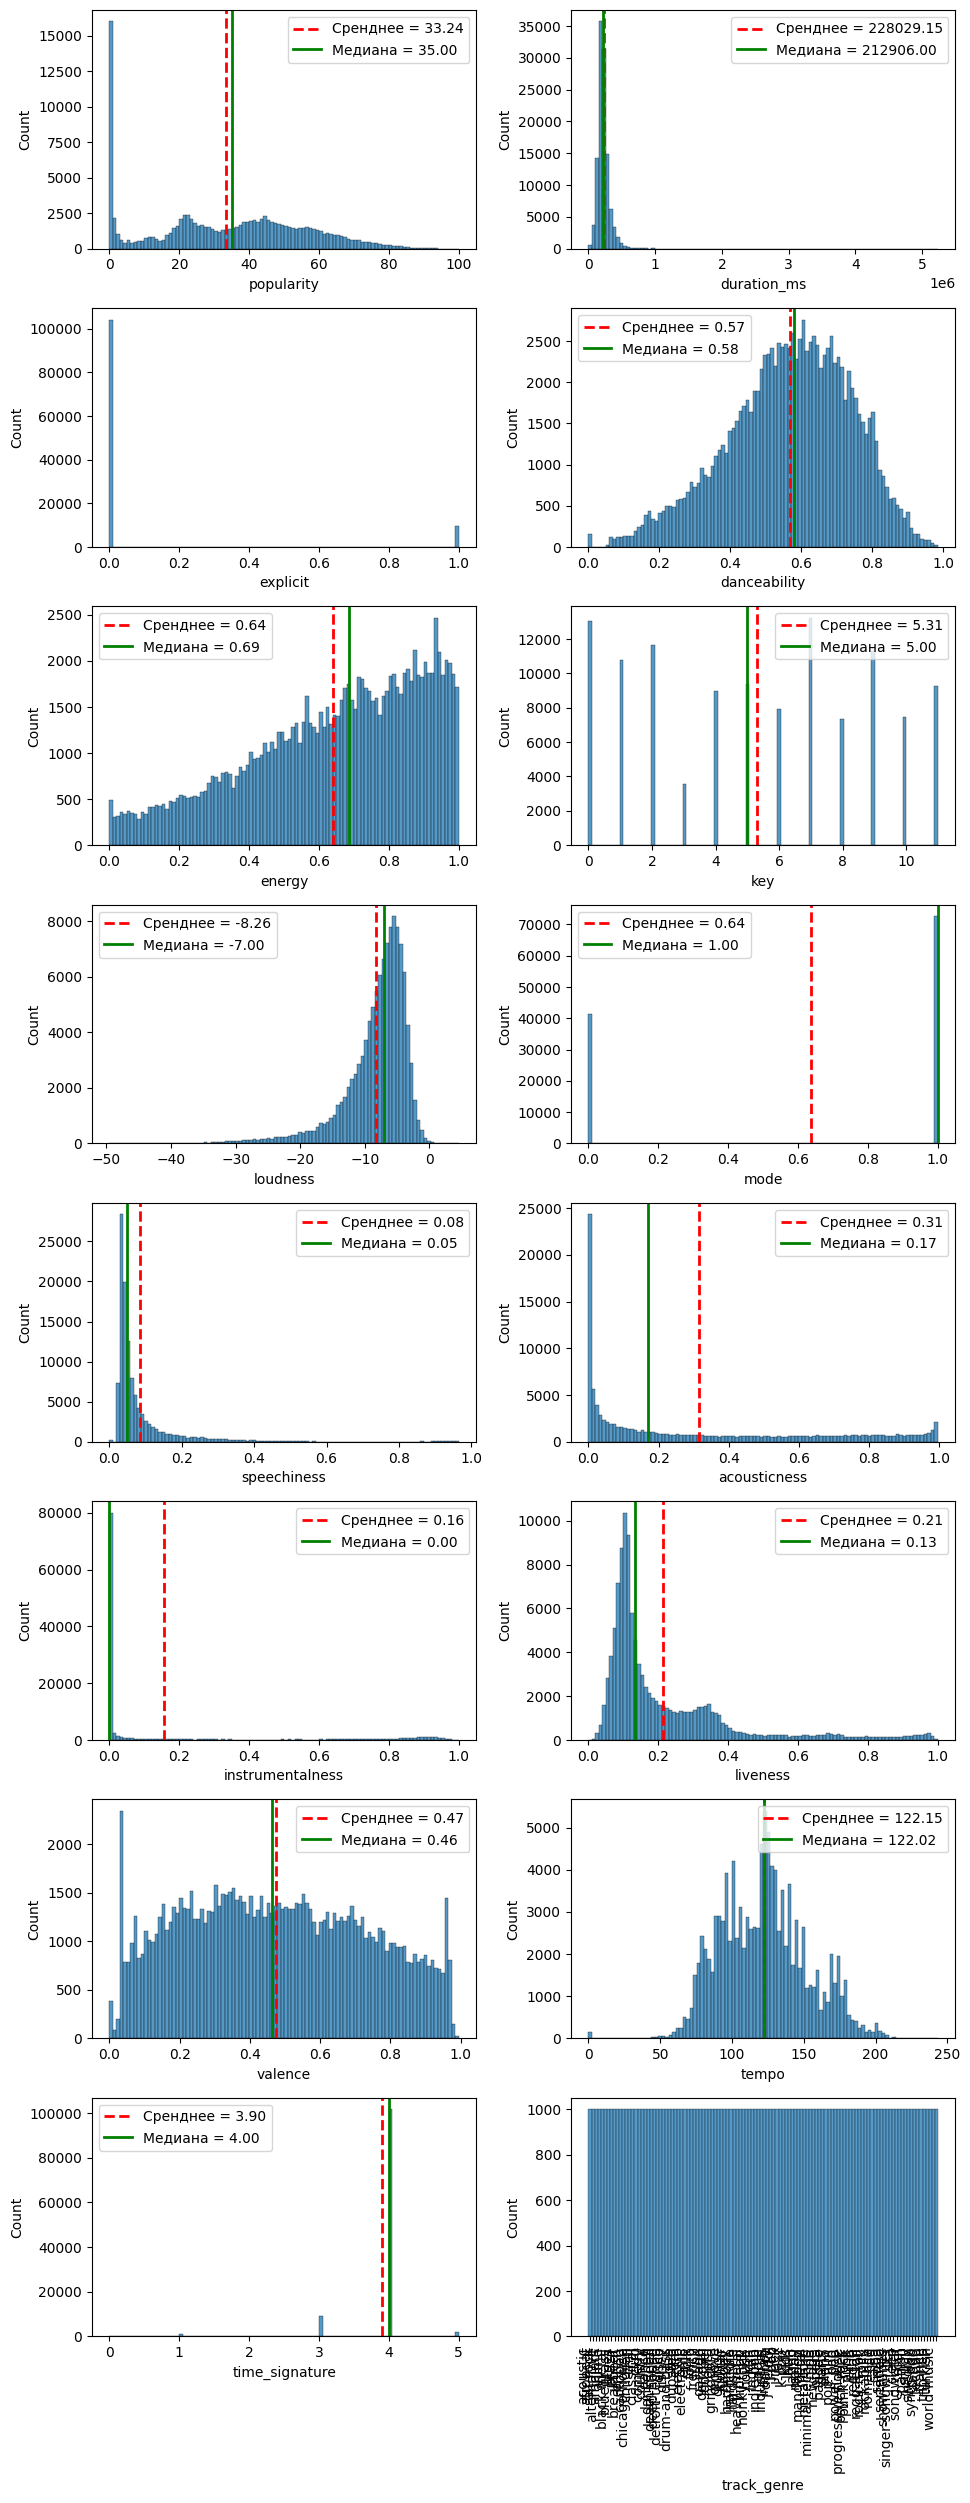

In [9]:
cols = data.columns.tolist()
n = len(cols)
ncols = 2
nrows = int(np.ceil(n / ncols))

fig, axs = plt.subplots(nrows, ncols, figsize=(5 * ncols, 3 * nrows))
axs = axs.flatten()

for i, col in enumerate(cols):
    ax = axs[i]
    sns.histplot(data[col], bins=100, ax=ax, edgecolor='k',  stat='count')
    if data[col].dtype not in ['object', 'bool']:
        mean_val = data[col].mean()
        median_val = data[col].median()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Сренднее = {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Медиана = {median_val:.2f}')
        ax.legend()

for j in range(n, len(axs)):
    axs[j].axis('off')


fig.tight_layout()
plt.xticks(rotation=90, ha='right') 
plt.show()

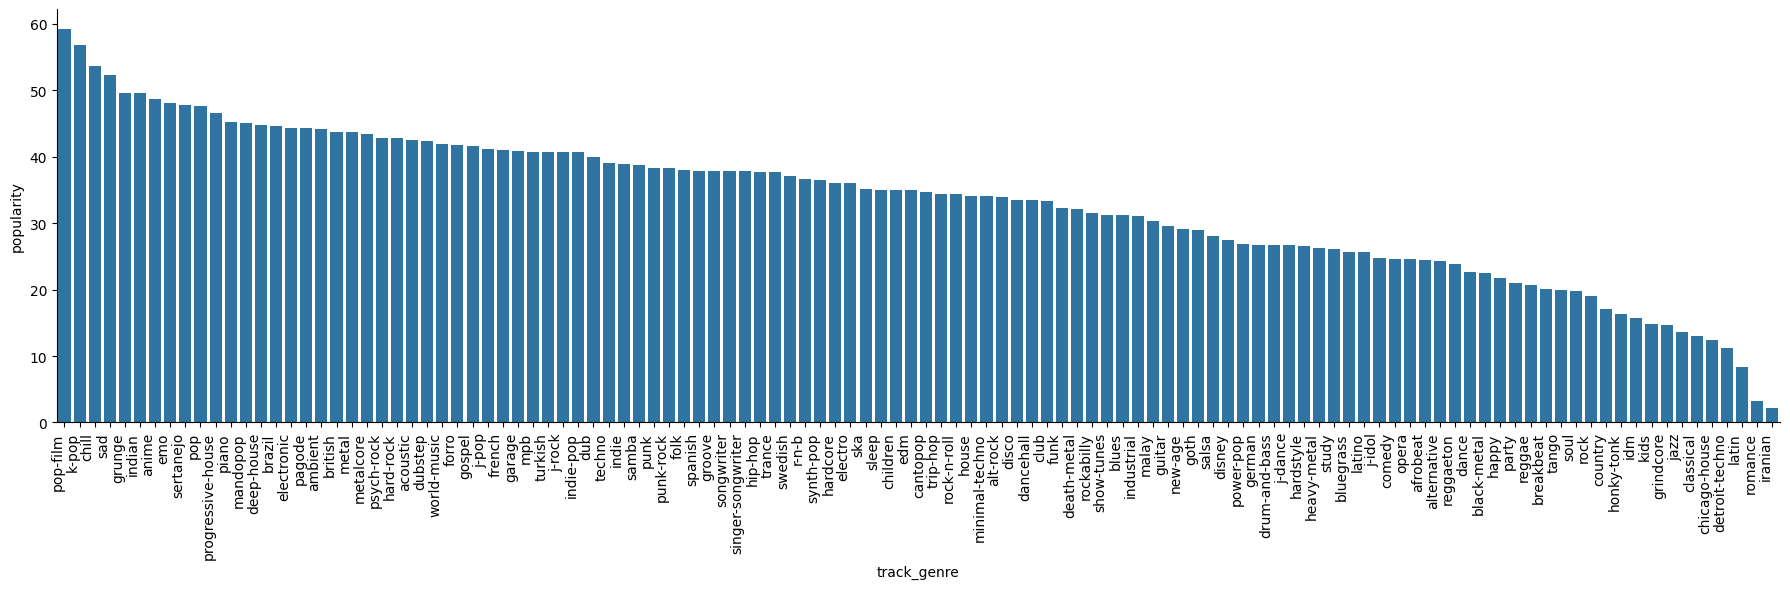

In [10]:
popularity_genres = data.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

sns.catplot(popularity_genres, kind="bar", height=6, aspect=3)

plt.xticks(rotation=90, ha='right')    
plt.tight_layout()                     
plt.show()

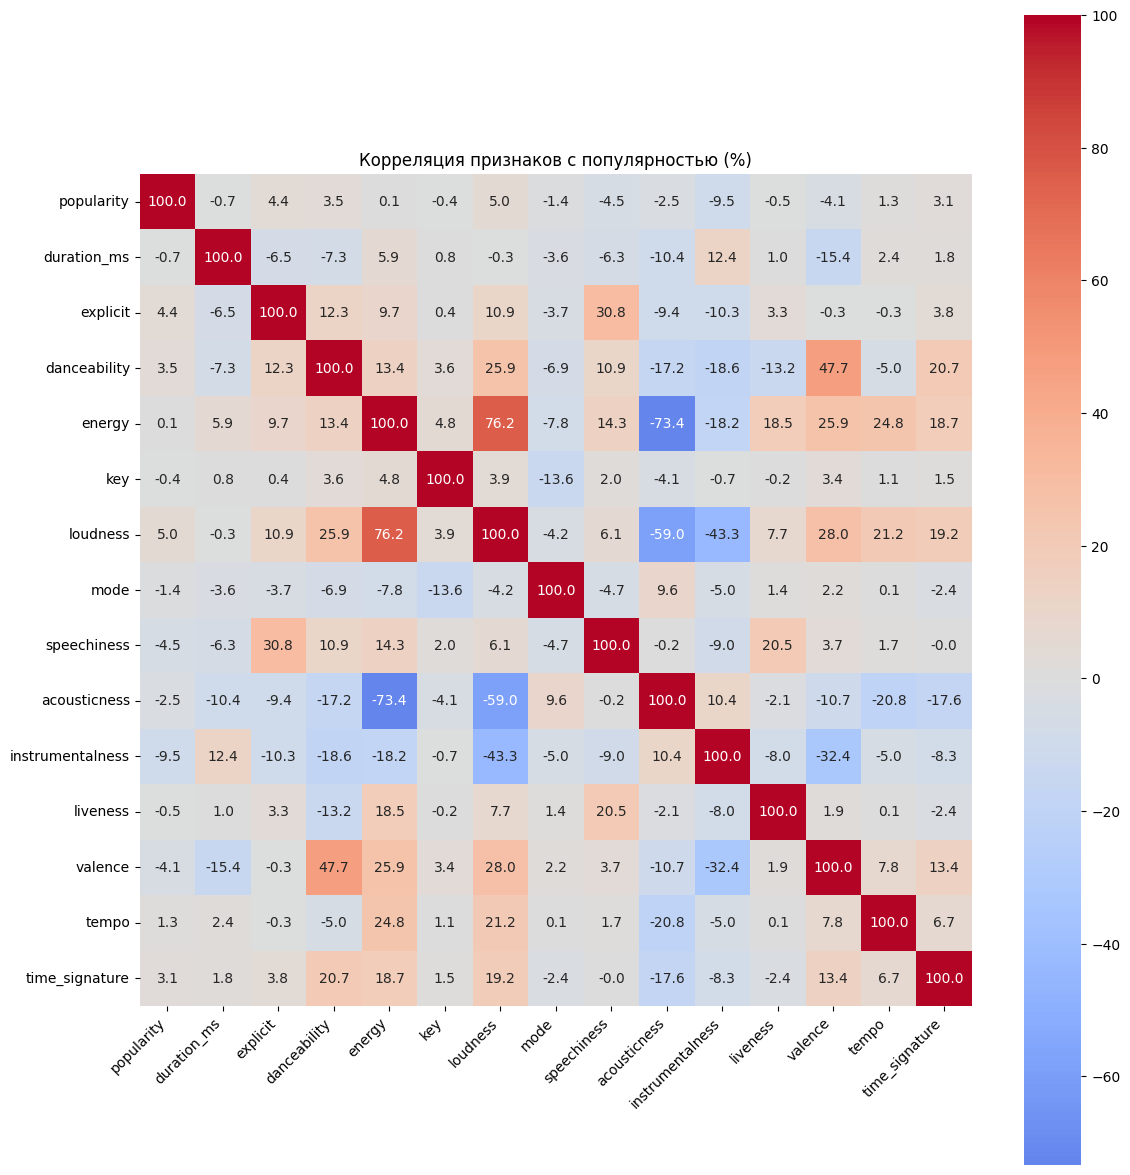

In [11]:
data_corr = data.drop(columns='track_genre').corr()
data_corr *= 100

plt.figure(figsize=(12,12))
sns.heatmap(data_corr, annot=True, fmt='.1f', cmap='coolwarm', center=0, square=True)
plt.title('Корреляция признаков с популярностью (%)')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


#### Разделение данных на ***категориальные*** и ***количественные*** признаки.

Считаю необходимым разделить данный датасет на Количественные и Категориальные признаки.  
Делать мы это будем с помощью анализа количества уникальных значений в каждом столбце.

In [12]:
data.nunique()

popularity            101
duration_ms         50697
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45653
time_signature          5
track_genre           114
dtype: int64

##### Количественные признаки

In [13]:
num_data = data.drop(columns=['popularity', 'explicit', 'key', 'mode', 'time_signature', 'track_genre'])
num_data.head()

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917
1,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489
2,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332
3,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740
4,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949


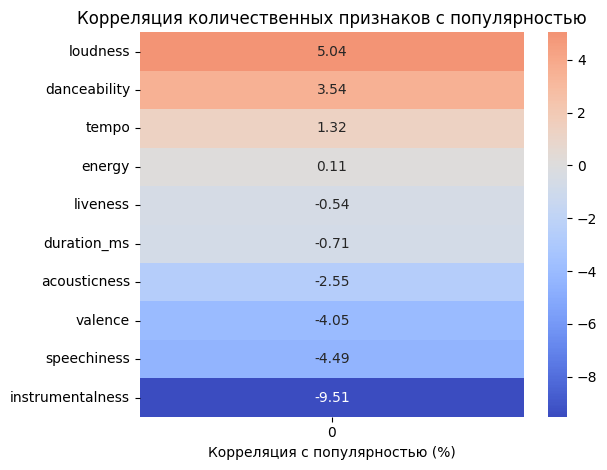

In [14]:
num_data_corr = num_data.corrwith(data['popularity']).sort_values(ascending=False)
num_data_corr *= 100

\
sns.heatmap(num_data_corr.to_frame(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.xlabel('Корреляция с популярностью (%)')
plt.title('Корреляция количественных признаков с популярностью')
plt.tight_layout()
plt.show()


##### Категориальные признаки

In [15]:
cat_data = data.loc[:, ['explicit', 'key', 'mode', 'time_signature', 'track_genre']]
cat_data.head()

,explicit,key,mode,time_signature,track_genre
0,False,1,0,4,acoustic
1,False,1,1,4,acoustic
2,False,0,1,4,acoustic
3,False,0,1,3,acoustic
4,False,2,1,4,acoustic


In [16]:
le_dict = {}
for col in cat_data.columns:
    le = LabelEncoder()
    cat_data[col] = le.fit_transform(cat_data[col])
    le_dict[col] = le
cat_data.head()


#Для возвращения категориальных признаков в исходный вид

# for col in le_dict:
#     print(f"Категории для столбца '{col}': {le_dict[col].classes_}")
#     cat_data[col] = le_dict[col].inverse_transform(cat_data[col])

# cat_data.head()

,explicit,key,mode,time_signature,track_genre
0,0,1,0,3,0
1,0,1,1,3,0
2,0,0,1,3,0
3,0,0,1,2,0
4,0,2,1,3,0


Text(0.5, 23.52222222222222, 'Корреляция с популярностью (%)')

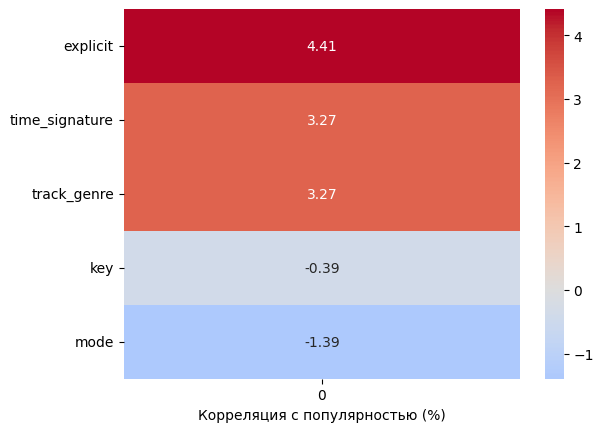

In [17]:
cat_data_corr = cat_data.corrwith(data['popularity']).sort_values(ascending=False)
cat_data_corr *= 100
sns.heatmap(cat_data_corr.to_frame(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.xlabel('Корреляция с популярностью (%)')

In [18]:
new_data = pd.concat([data['popularity'], num_data, cat_data], axis=1)
new_data.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,explicit,key,mode,time_signature,track_genre
0,73,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,0,1,0,3,0
1,55,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,0,1,1,3,0
2,57,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,0,0,1,3,0
3,71,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,0,0,1,2,0
4,82,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,0,2,1,3,0


# Feature Engineering/Importances


### New features

In [19]:
featured_data = new_data.copy()

In [20]:
featured_data['loudness_norm']  = (new_data.loudness + 60) / 60
featured_data['duration_sec'] = new_data.duration_ms // 1000
featured_data['duration_min'] = new_data.duration_ms // 60000
featured_data['time_cat'] = pd.cut(featured_data.duration_min, bins=[0,2,4,6,8,10,15,30,60], labels=False).fillna(-1).astype(int)


### Testing fiatures

In [21]:
x = featured_data.drop(columns=['popularity']) 
y = featured_data['popularity'] 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='AdamW', 
              loss='mean_squared_error',
              metrics= [metrics.MeanAbsoluteError(),metrics.R2Score()])

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

model.evaluate(x_test, y_test)


s:\Projects\ml_summer_prac\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - loss: 436.6837 - mean_absolute_error: 16.8032 - r2_score: 0.1151


[436.6837158203125, 16.803165435791016, 0.11509603261947632]

In [23]:
result = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step
713/713 ━━━

In [24]:
# loss_df = pd.DataFrame(result.importances.T, columns= featured_data.drop(columns=['popularity']).columns)
# loss_df

<Axes: xlabel='Изменение MAE от признака', ylabel='None'>

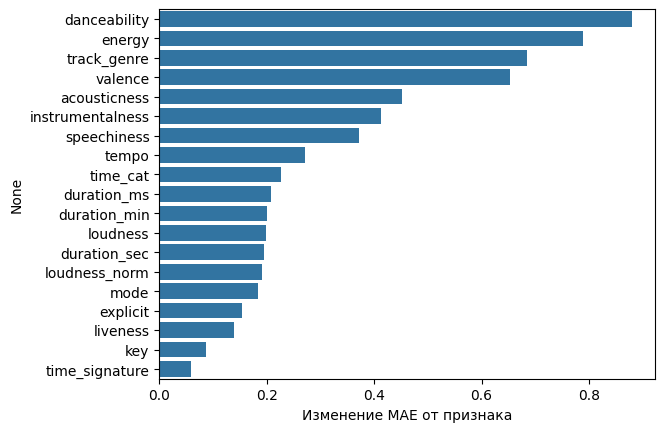

In [25]:
mean_loss_df = pd.DataFrame(
    result.importances_mean, 
    index=featured_data.drop(columns=['popularity']).columns, 
    columns=['Изменение MAE от признака']).sort_values(by='Изменение MAE от признака', ascending=False)
mean_loss_df
sns.barplot(x=mean_loss_df['Изменение MAE от признака'], y=mean_loss_df.index)

Делая вывод из данного графика, можно судить о том, что признаки продолжительности трека в милисекундах и секундах вносят меньшее влияние на результат чем длительность в минутах. Так же, как и поле категории длительности трека.  
  
Что касается нового признака "loudness_norm", он не показывает себя лучше чем стандартный "loudness", возможно по причине работы StandartScaler перед обучением.  

Исходя из этого, удалим эти признаки оставив только "duration_min" и закончим модификацию данных.

In [26]:
featured_data = featured_data.drop(columns=['duration_ms', 'duration_sec', 'loudness_norm', 'time_cat'])
featured_data.head()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,explicit,key,mode,time_signature,track_genre,duration_min
0,73,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,0,1,0,3,0,3
1,55,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,0,1,1,3,0,2
2,57,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,0,0,1,3,0,3
3,71,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,0,0,1,2,0,3
4,82,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,0,2,1,3,0,3


# Эксперементы с готовыми моделями ML/DL.

In [27]:
def metrics_evaluate(model, x_test, y_test, x_train, y_train):
    y_pred_test = np.ravel(model.predict(x_test))
    y_pred_train = np.ravel(model.predict(x_train))

    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test  = r2_score(y_test, y_pred_test)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train  = r2_score(y_train, y_pred_train)

    df = pd.DataFrame(
        {
            'mae_test': [mae_test],
            'mae_train': [mae_train],
            'mse_test': [mse_test],
            'mse_train': [mse_train],
            'r2_test': [r2_test],
            'r2_train': [r2_train]
        },

    )
    return df

In [28]:
x = featured_data.drop(columns=['popularity']) 
y = featured_data['popularity'] 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Семейство моделей нейронных сетей

In [29]:
neuro_model = keras.Sequential()
neuro_model.add(keras.layers.Input(shape=(x_train.shape[1],)))
neuro_model.add(keras.layers.Dense(128, activation='relu'))
neuro_model.add(keras.layers.Dropout(0.2))
neuro_model.add(keras.layers.Dense(64, activation='relu'))
neuro_model.add(keras.layers.Dropout(0.1))
neuro_model.add(keras.layers.Dense(32, activation='relu'))
neuro_model.add(keras.layers.Dense(1))


neuro_model.compile(optimizer='AdamW', 
              loss='mean_squared_error')

# callback = keras.callbacks.EarlyStopping(monitor='val_loss',
#                                          patience=25,
#                                          restore_best_weights=True)

neuro_model.fit(x_train, y_train, epochs=300, batch_size=128, validation_split=0.2, verbose=1)


Epoch 1/300
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 579.1544 - val_loss: 480.9357
Epoch 2/300
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 486.6098 - val_loss: 470.6453
Epoch 3/300
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 477.4388 - val_loss: 463.5843
Epoch 4/300
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 471.6315 - val_loss: 461.3610
Epoch 5/300
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 468.8248 - val_loss: 458.1942
Epoch 6/300
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 466.1288 - val_loss: 458.2424
Epoch 7/300
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 463.7496 - val_loss: 457.9550
Epoch 8/300
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 460.8615 - val_loss: 454.9699
Epoch 9/300
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 459.8422 - val_loss: 451.5502
Epoch 10/300
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 457.9355 - val_loss: 450.4066
Epoch 11/300
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 457.7735 - val_loss: 450.40

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 2s 533us/step


,mae_test,mae_train,mse_test,mse_train,r2_test,r2_train
0,15.181576,14.331135,382.828583,338.859772,0.224228,0.320256


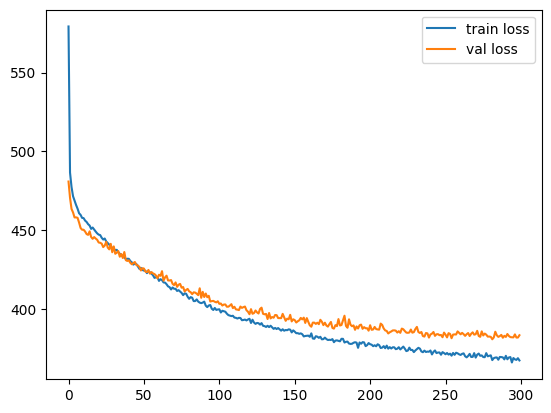

In [30]:
plt.Figure(figsize=(10,6))
sns.lineplot(data=neuro_model.history.history['loss'], label='train loss')
sns.lineplot(data=neuro_model.history.history['val_loss'], label='val loss')

metrics_evaluate(neuro_model, x_test, y_test, x_train, y_train)

### Дерево решений

In [31]:
dtr_metrics_df = pd.DataFrame()

for i in range(1,21):
    dtr_model = DecisionTreeRegressor(max_depth=i, random_state=42)  
    dtr_model.fit(x_train, y_train)
    
    dtr_metrics_df = pd.concat([dtr_metrics_df, metrics_evaluate(dtr_model, x_test, y_test, x_train, y_train)], ignore_index=True)
    
dtr_metrics_df.index = range(1,21)

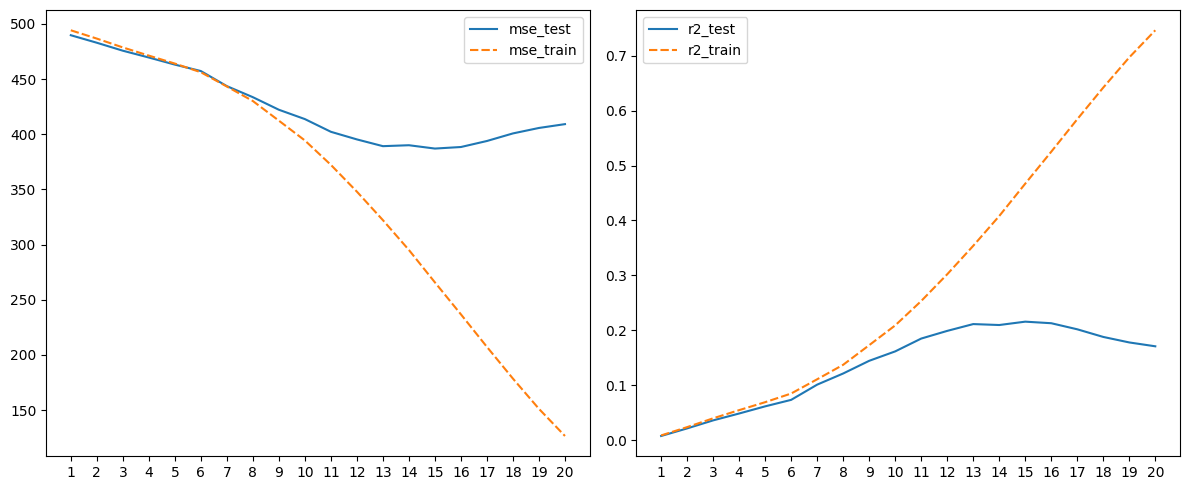

In [32]:
plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
plt.xticks(range(1,21))
sns.lineplot(data=dtr_metrics_df[['mse_test', 'mse_train']])

plt.subplot(1,2,2)
plt.xticks(range(1,21))
sns.lineplot(data=dtr_metrics_df[['r2_test','r2_train']])


plt.tight_layout()
plt.show()

### Линейная регрессия

In [33]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

linear_metrics_df = metrics_evaluate(linear_model, x_test, y_test, x_train, y_train)
linear_metrics_df.T

,0
mae_test,18.307463
mae_train,18.371236
mse_test,481.917977
mse_train,485.387514
r2_test,0.023431
r2_train,0.026325


### Градиентный бустинг

In [34]:
gradient_model_v1 = GradientBoostingRegressor(
    n_estimators=1000,  
    learning_rate=0.05, 
    max_depth=7,  
    random_state=42,
    verbose=1,
    validation_fraction= 0.2
)

gradient_model_v1.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1         493.1242            8.53m
         2         488.2288            8.34m
         3         483.5489            8.42m
         4         479.0853            8.37m
         5         474.3771            8.34m
         6         470.2126            8.32m
         7         465.3407            8.29m
         8         461.1810            8.27m
         9         456.9358            8.26m
        10         454.2478            8.25m
        20         423.5622            8.15m
        30         398.7916            8.02m
        40         380.5799            7.89m
        50         367.6037            7.78m
        60         357.5781            7.73m
        70         348.2611            7.66m
        80         339.4592            7.57m
        90         333.0492            7.49m
       100         327.5383            7.39m
       200         289.6232            6.53m
       300         262.5431            5.67m
       40

,loss,'squared_error'
,learning_rate,0.05
,n_estimators,1000
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,7
,min_impurity_decrease,0.0
,init,None


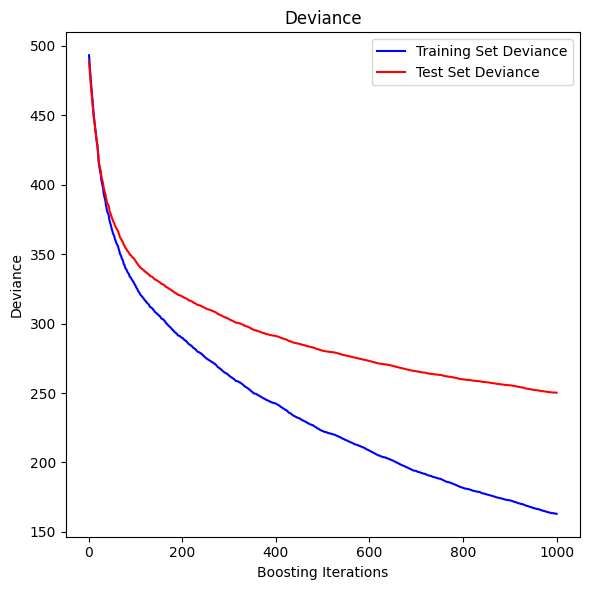

,mae_test,mae_train,mse_test,mse_train,r2_test,r2_train
0,11.584682,9.260985,250.247095,163.06248,0.492894,0.672901


In [35]:
test_score = np.zeros((1000), dtype=np.float64)
for i, y_pred in enumerate(gradient_model_v1.staged_predict(x_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(1000) + 1,
    gradient_model_v1.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(1000) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

metrics_evaluate(gradient_model_v1, x_test, y_test, x_train, y_train)

In [36]:
gradient_model_v2 = GradientBoostingRegressor(
    n_estimators=1000,  
    learning_rate=0.12, 
    max_depth=3,  
    random_state=42,
    subsample=0.95,
    verbose=1
)

gradient_model_v2.fit(x_train, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1         493.9165           4.2002            3.41m
         2         490.4721           3.8881            3.38m
         3         488.0402          12.1148            3.36m
         4         485.5679          -6.0083            3.35m
         5         479.5733           8.9639            3.36m
         6         477.5089           7.3778            3.34m
         7         474.1341         -23.1213            3.34m
         8         474.0212          28.1928            3.34m
         9         468.0244         -21.3638            3.33m
        10         467.0691          24.8437            3.33m
        20         447.2328           5.7212            3.30m
        30         437.8576           8.4041            3.25m
        40         430.4634          -3.1259            3.21m
        50         423.7915           7.6630            3.18m
        60         417.4638          -1.3941            3.14m
       

,loss,'squared_error'
,learning_rate,0.12
,n_estimators,1000
,subsample,0.95
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


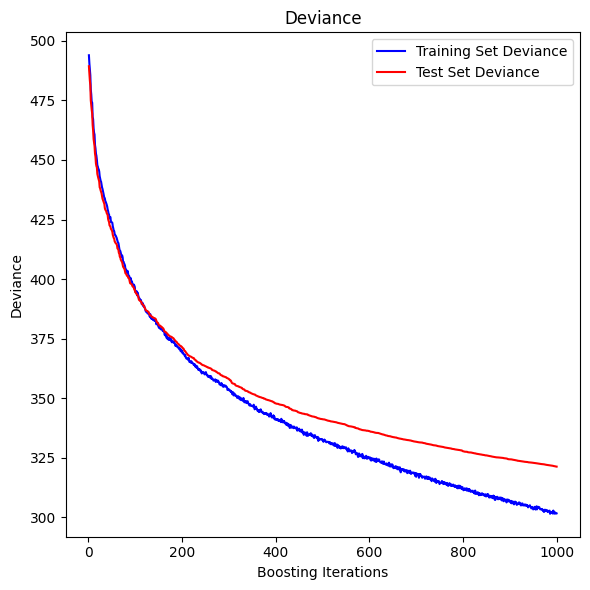

,mae_test,mae_train,mse_test,mse_train,r2_test,r2_train
0,13.452753,12.991842,321.316629,301.629133,0.348877,0.394939


In [37]:
test_score = np.zeros((1000), dtype=np.float64)
for i, y_pred in enumerate(gradient_model_v2.staged_predict(x_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(1000) + 1,
    gradient_model_v2.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(1000) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

metrics_evaluate(gradient_model_v2, x_test, y_test, x_train, y_train)

# Кросс-Валидация 5 фолдов

In [38]:
scaler = StandardScaler()
x_data = pd.DataFrame(scaler.fit_transform(featured_data.drop(columns='popularity')))
y_data = featured_data['popularity']

kfld = KFold(n_splits=5, shuffle=True, random_state=52) 

In [39]:
gradient_model_v3 = GradientBoostingRegressor(
    n_estimators=1000,  
    learning_rate=0.125, 
    max_depth=3,  
    random_state=42,
    subsample=0.95,
    verbose=0
)

fold_metrics = pd.DataFrame()

for fold, (train, test) in enumerate(kfld.split(x_data)):
    x_train, x_test = x_data.iloc[train], x_data.iloc[test]
    y_train, y_test = y_data.iloc[train], y_data.iloc[test]

    # Обучение модели на тренировочных данных
    gradient_model_v3.fit(x_train, y_train)

    fold_metrics = pd.concat([metrics_evaluate(gradient_model_v3, x_test, y_test, x_train, y_train), fold_metrics], ignore_index=True)

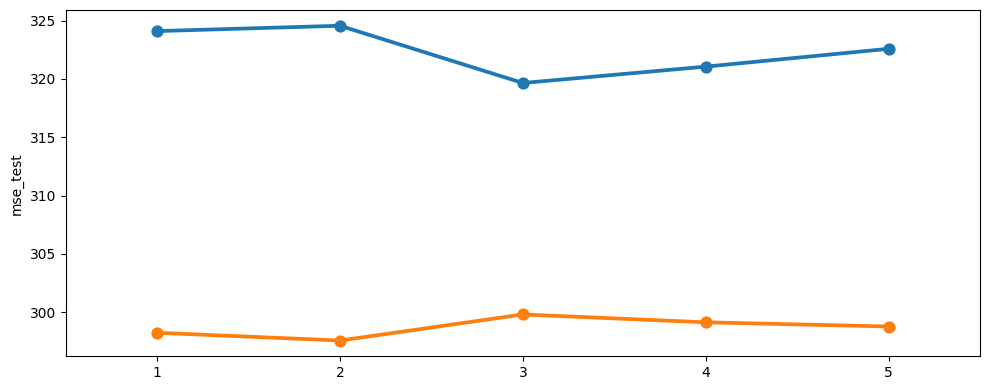

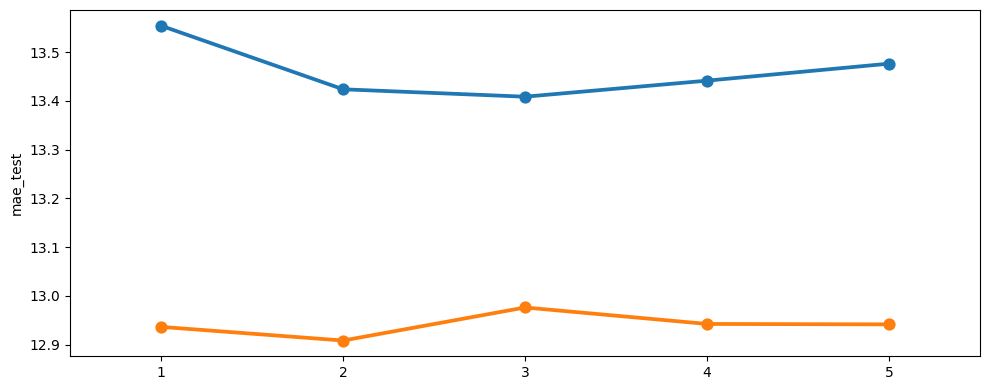

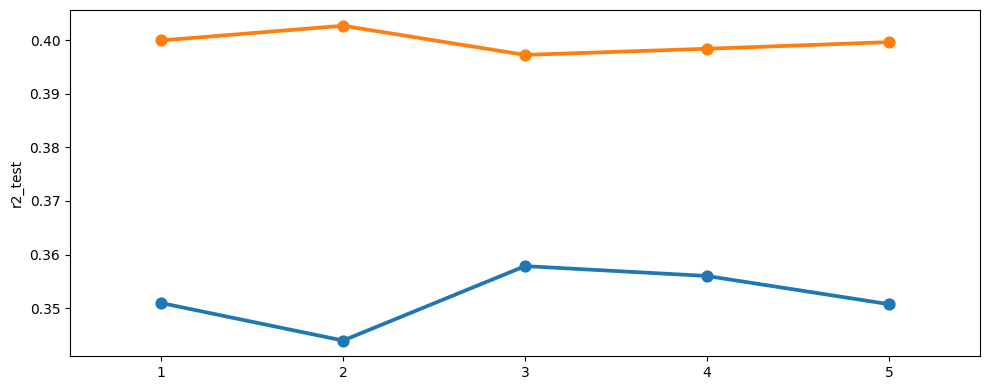

In [43]:
fold_metrics.index = range(1,6)
fold_metrics.index = fold_metrics.index.astype(str)

plt.figure(figsize=(10,4))
sns.pointplot(fold_metrics['mse_test'], native_scale=True).set_label('test')
sns.pointplot(fold_metrics['mse_train'], native_scale=True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.pointplot(fold_metrics['mae_test'], native_scale=True, label='mae_test')
sns.pointplot(fold_metrics['mae_train'], native_scale=True, label='mae_train')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.pointplot(fold_metrics['r2_test'], native_scale=True, label='r2_test')
sns.pointplot(fold_metrics['r2_train'], native_scale=True, label='r2_train')
plt.tight_layout()
plt.show()

# Вывод